<a href="https://colab.research.google.com/github/anirudhrecharla/CODSOFT/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3-CUSTOMER CHUYRN PREDICTION

# 1. Read or Extract Data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 2. EDA - Explanatory Data Analysis

In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 3. Data preprocessing - Feature scaling, encoding

In [ ]:
print("number of unique values: ",len(data["Geography"].unique()),'\nList of unique values:',data["Geography"].unique())

number of unique values:  3 
List of unique values: ['France' 'Spain' 'Germany']


In [ ]:
from sklearn.preprocessing import LabelEncoder
sc=LabelEncoder()
data["Geography"]=sc.fit_transform(data["Geography"])
print("Number of unique values:",len(data["Geography"].unique()),'\nList of unique values:',data["Geography"].unique())

Number of unique values: 3 
List of unique values: [0 2 1]


In [ ]:
print("Number of unique values:", len(data["Gender"].unique()),'\nList of unique values:',data["Gender"].unique())

Number of unique values: 2 
List of unique values: ['Female' 'Male']


In [ ]:
from sklearn.preprocessing import LabelEncoder
preprocessing=LabelEncoder()
data["Gender"]=preprocessing.fit_transform(data["Gender"])
print("Number of unique values:", len(data["Gender"].unique()),'\nList of unique values:',data["Gender"].unique())

Number of unique values: 2 
List of unique values: [0 1]


In [ ]:
print("Number of unique values : ",len(data["Surname"].unique()),'\nList of unique values :',data["Surname"].unique())

Number of unique values :  2932 
List of unique values : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# 4. Feature Extraction

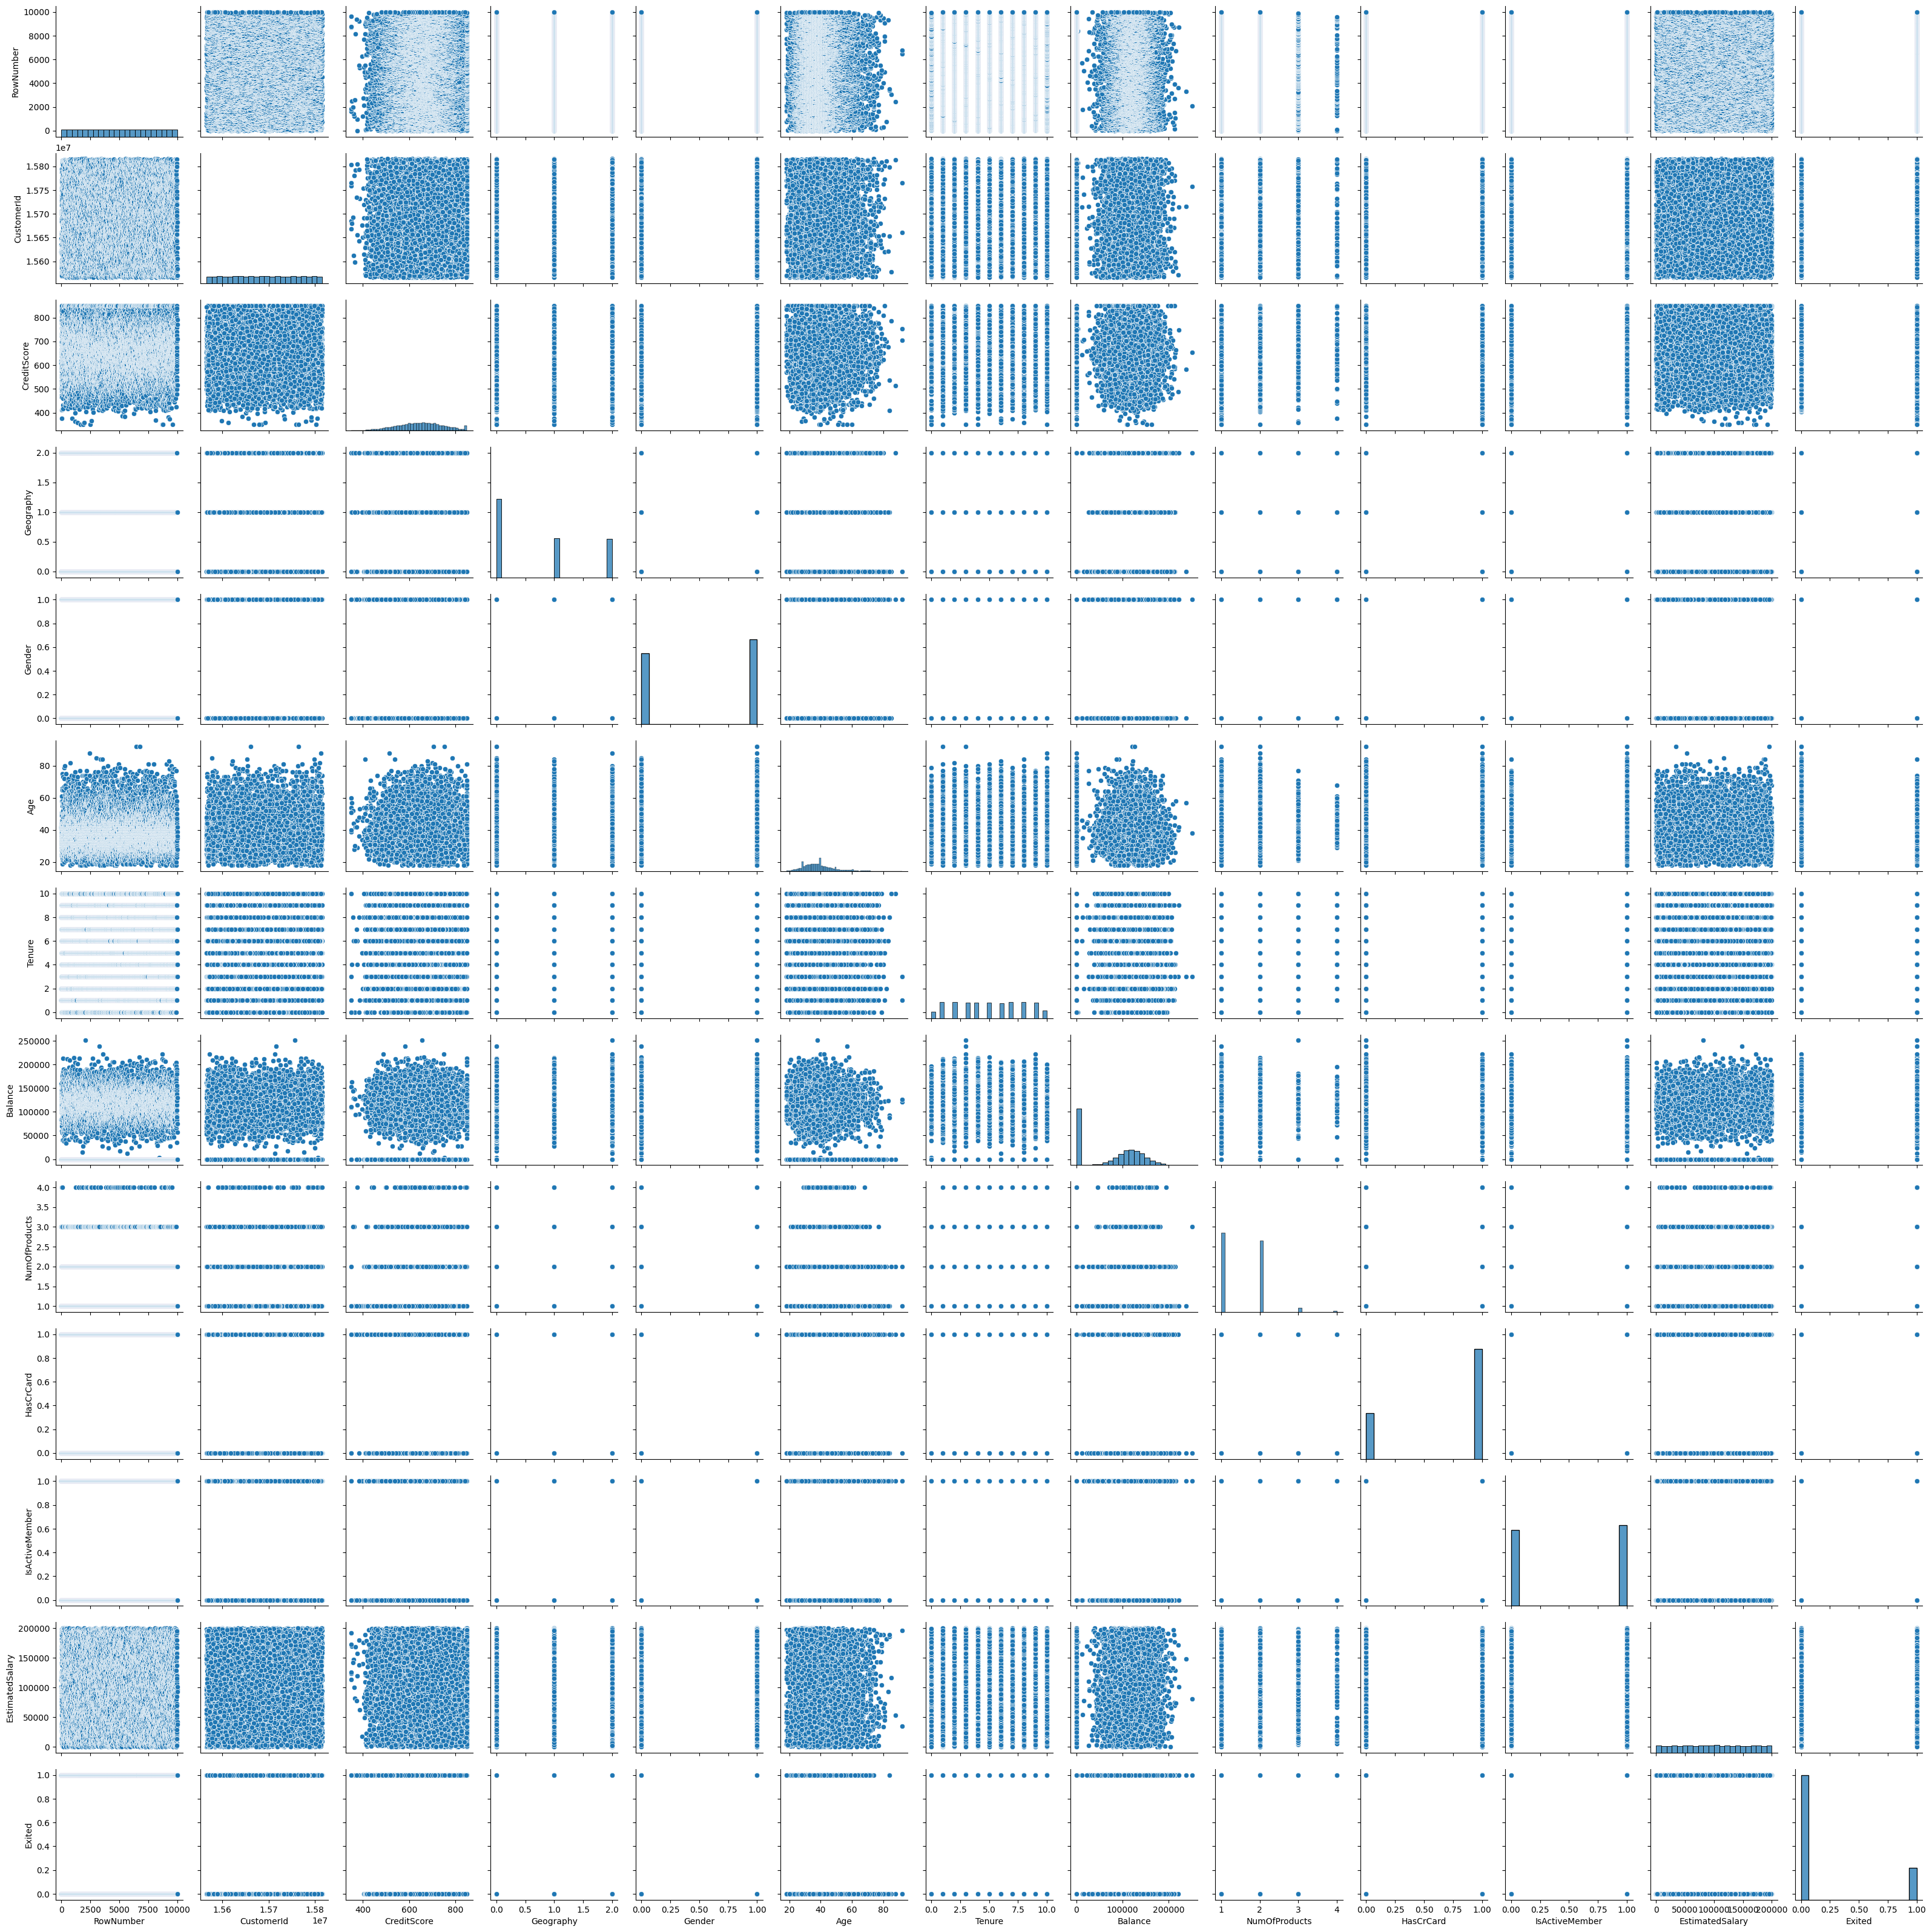

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

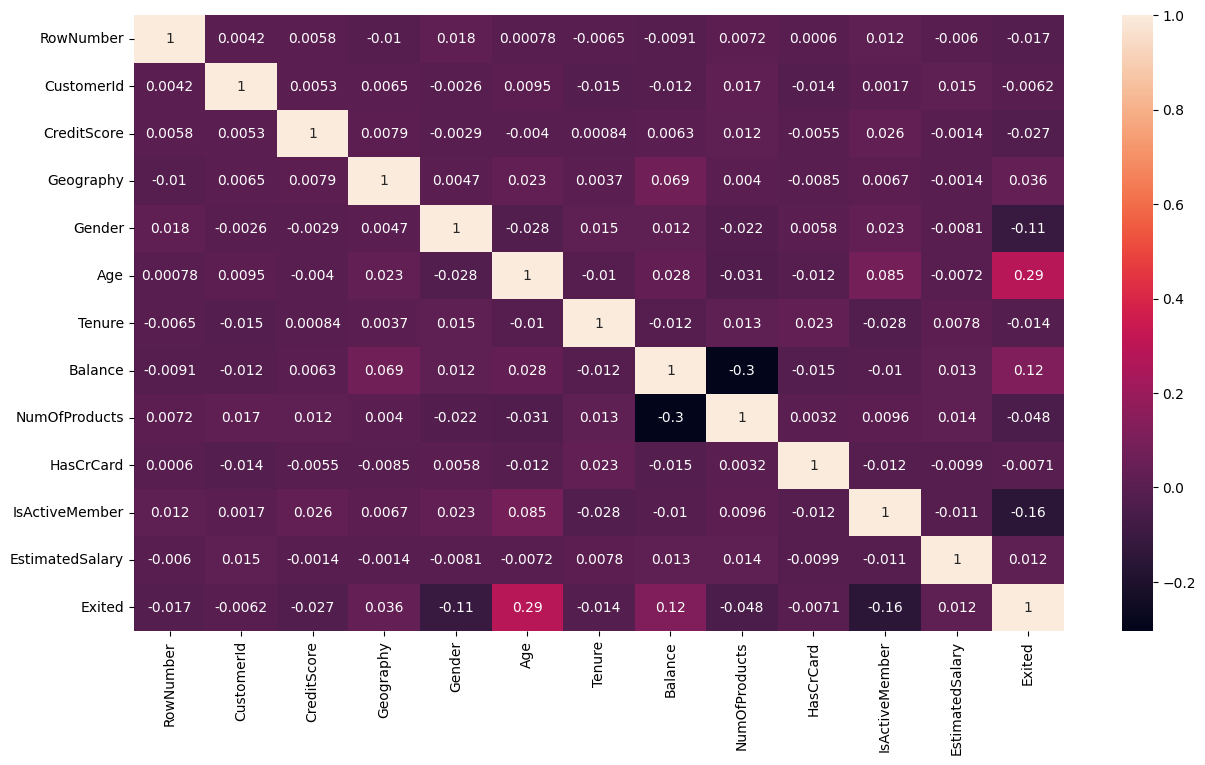

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[15,8])

numerical_data = data.select_dtypes(include=['number'])

sns.heatmap(numerical_data.corr(),annot=True)
plt.show()

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
x=data.iloc[:,3:-1]
y=data.iloc[:,-1].values

In [ ]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

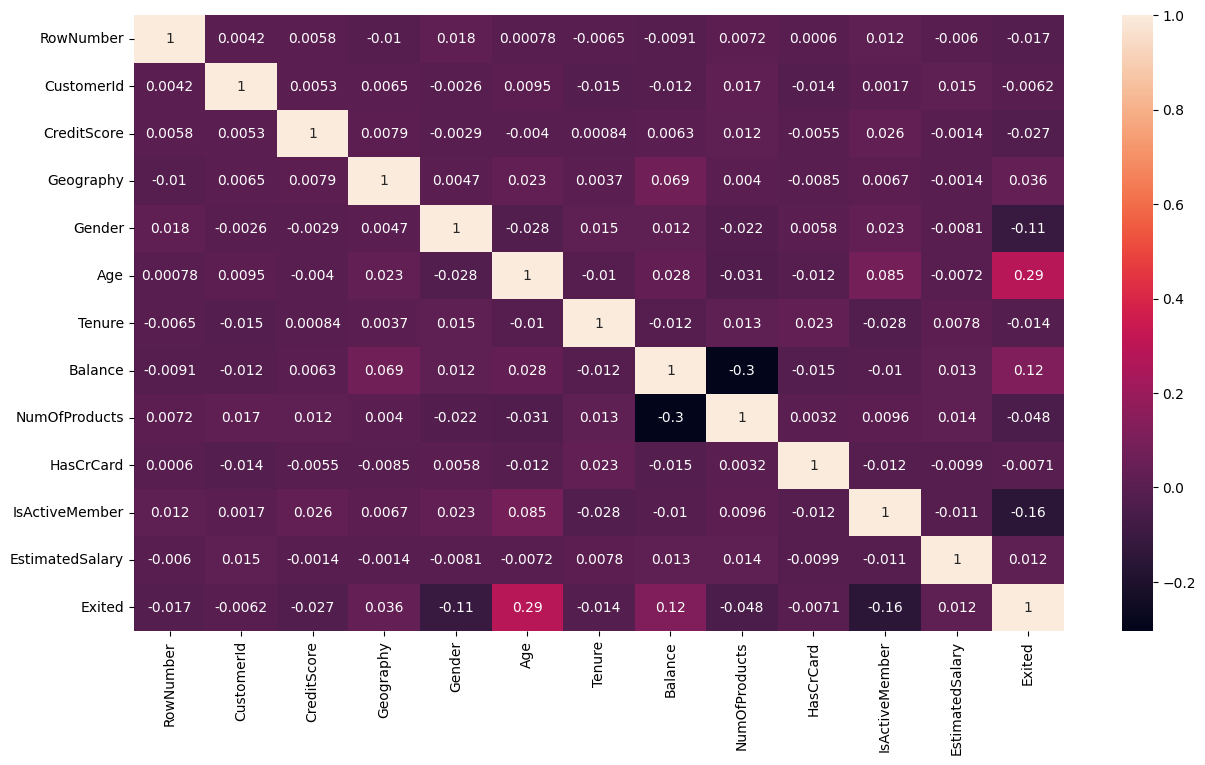

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[15,8])

numerical_data = data.select_dtypes(include=['number'])

sns.heatmap(numerical_data.corr(),annot=True)
plt.show()

# 4. Model Building - Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (7000, 10)
Shape of x_test:  (3000, 10)
Shape of y_train:  (7000,)
Shape of y_test:  (3000,)


In [ ]:
x=data.iloc[:,3:-1]
y=data.iloc[:,-1].values

# 5. Model Prediction and Evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix # Import the required metrics
import numpy as np

x = data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)
categorical_features = ['Geography', 'Gender']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(x[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

x = x.drop(categorical_features, axis=1)
x = pd.concat([x, encoded_df], axis=1)
y = data['Exited'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

logR = LogisticRegression()
logR.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=logR.predict(x_test)


In [ ]:
r2s=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
accsc=accuracy_score(y_test,y_pred)
f1s=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print("R2 Score: ",r2s)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)
print("Accuracy Score: ",accsc)
print("F1 Score: ",f1s)
print("Confusion Matrix: \n",cm)

R2 Score:  -0.08863285856844749
Mean Absolute Error:  0.17066666666666666
Mean Squared Error:  0.17066666666666666
Root Mean Squared Error:  0.4131182235954578
Accuracy Score:  0.8293333333333334
F1 Score:  0.40877598152424943
Confusion Matrix: 
 [[2311  105]
 [ 407  177]]


# 6. Model Building - Random Forests

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (7000, 12)
Shape of x_test:  (3000, 12)
Shape of y_train:  (7000,)
Shape of y_test:  (3000,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

# 7. Model Predition and Evaluation

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix, f1_score # Import f1_score
import numpy as np

test_score = rf.score(x_test, y_test)
train_score = rf.score(x_train, y_train)
print("Train Score: ", train_score)
print("Test Score: ", test_score)

Train Score:  1.0
Test Score:  1.0


In [ ]:
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
r2s=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
accsc=accuracy_score(y_test,y_pred)
f1s=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print("R2 Score: ",r2s)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)
print("Accuracy Score: ",accsc)
print("F1 Score: ",f1s)
print("Confusion Matrix: \n",cm)

R2 Score:  1.0
Mean Absolute Error:  0.0
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0
Accuracy Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[2416    0]
 [   0  584]]


# 8. Model Building - Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (7000, 12)
Shape of x_test:  (3000, 12)
Shape of y_train:  (7000,)
Shape of y_test:  (3000,)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

# 9. Model predition and **Evalution**

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix, f1_score # Import f1_score
import numpy as np

test_score=gb.score(x_test,y_test)
train_score=gb.score(x_train,y_train)
print("Train Score: ",train_score)
print("Test Score: ",test_score)

Train Score:  1.0
Test Score:  1.0


In [ ]:
y_pred=gb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
r2s=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
accsc=accuracy_score(y_test,y_pred)
f1s=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print("R2 Score: ",r2s)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)
print("Accuracy Score: ",accsc)
print("F1 Score: ",f1s)
print("Confusion Matrix: \n",cm)

R2 Score:  1.0
Mean Absolute Error:  0.0
Mean Squared Error:  0.0
Root Mean Squared Error:  0.0
Accuracy Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[2416    0]
 [   0  584]]


# 10. Model **Testing**

In [ ]:
x_test.iloc[0]

,6252
CreditScore,596.00
Age,32.00
Tenure,3.00
Balance,96709.07
NumOfProducts,2.00
HasCrCard,0.00
IsActiveMember,0.00
EstimatedSalary,41788.37
Exited,0.00
Geography_1,1.00


In [ ]:
from sklearn.metrics import accuracy_score
def test_single_instance(models, x_test, y_test, index=0) :

  actual_value = y_test[index]
  data_value=x_test.iloc[index]
  print(f"Actual churn for the instance (index):", actual_value, "\nData Value: \n", data_value, '\n\n')
  for model_name, model in models.items():
    print(f"Model testing for {model_name}")
    y_pred_single = model.predict(x_test.iloc[[index]])
    print("\tPredicted churn for instance (index):", y_pred_single[0])
    accuracy = accuracy_score([actual_value], y_pred_single)
    print(f"\tAccuracy for instance (index):", accuracy)
    print("*"*60)

models = {
    'Logistic Regression':logR,
    'Random Forest': rf,
    'Gradient Boosting': gb
    }

test_single_instance(models, x_test, y_test, index=0) #Fixed indentation

Actual churn for the instance (index): 0 
Data Value: 
 CreditScore          596.00
Age                   32.00
Tenure                 3.00
Balance            96709.07
NumOfProducts          2.00
HasCrCard              0.00
IsActiveMember         0.00
EstimatedSalary    41788.37
Exited                 0.00
Geography_1            1.00
Geography_2            0.00
Gender_1               1.00
Name: 6252, dtype: float64 


Model testing for Logistic Regression
	Predicted churn for instance (index): 0
	Accuracy for instance (index): 1.0
************************************************************
Model testing for Random Forest
	Predicted churn for instance (index): 0
	Accuracy for instance (index): 1.0
************************************************************
Model testing for Gradient Boosting
	Predicted churn for instance (index): 0
	Accuracy for instance (index): 1.0
************************************************************
